# <div style="text-align: center;"><u>**Asturias Housing Price Predictor - Aitor Pérez**</u></div>

### **#️⃣ Project Description**
This project leverages Machine Learning to predict housing prices in Asturias, Spain. The model is trained using data scraped from Idealista, including features such as property type, location, square footage, number of bedrooms, and price. The main goal is to provide a tool that assists buyers in making informed housing decisions.

### **🎯 Project Objectives**
- Predict housing prices based on their features.
- Identify the most influential variables affecting price (e.g., square meters, location).
- Compare various Machine Learning models to select the most suitable one.
- Provide a practical solution for real estate market analysis in Asturias.

### **🧷 Importing Libraries**

In [1]:
# | -------------------------------- |
# | Loading required libraries       |
# | -------------------------------- |
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from category_encoders import TargetEncoder
from sklearn.inspection import permutation_importance
import pickle

import sys
import os
sys.path.append(os.path.join(os.getcwd(), '../utils'))

# Custom functions
from toolbox_ML import *
from bootcampviztools import *

# ⚠️ Disable warnings
import warnings
warnings.simplefilter("ignore")

# 🎨 Define general settings and colors
sns.set_theme(style='white', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
gcolors = {'oscuro': '#1e35a1', 'medio': '#0c79f3', 'claro': '#59a7ff'}

# 🎲 Reproducible seed
seed = 22

In [2]:
# Load data and display the first rows
df = pd.read_csv("../data_sample/scrap_data_asturias.csv", sep=";")
df.head()

,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
0,310905,Duplex,Particular,-,Cangas de Narcea,-,77000.0,1222.0,63,1.0,1.0,3,"43,1746686","-6,5518582",No,No,No,Sí,No,No,No,No,No
1,316842,Piso,Particular,-,Grado,-,80000.0,920.0,87,3.0,1.0,2,"43,3870028","-6,0759685",No,No,No,No,No,No,No,No,No
2,325749,Piso,Particular,-,Aller,-,70000.0,1167.0,60,2.0,1.0,2,"43,1593694","-5,6203693",Sí,No,No,No,No,No,No,Sí,No
3,340311,Piso,Particular,Fozaneldi-Tenderina,Oviedo,Fozaneldi-Tenderina-Ventanielles,110000.0,2750.0,40,1.0,1.0,2,"43,3624612","-5,8325263",Sí,No,No,No,No,No,No,Sí,No
4,400928,Piso,Particular,HUCA-La Cadellada,Oviedo,Corredoria-Huca-Teatinos,160000.0,3333.0,48.0,1.0,1.0,5,"43,3727912","-5,8297483",Sí,No,No,No,No,No,No,No,No


In [3]:
# General dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Id del anuncio                         3678 non-null   int64  
 1   Tipo de inmueble                       3678 non-null   object 
 2   Tipo de vendedor                       3678 non-null   object 
 3   Barrio                                 3678 non-null   object 
 4   Municipio                              3678 non-null   object 
 5   Distrito                               3678 non-null   object 
 6   Precio                                 3678 non-null   float64
 7   Euros/m2                               3678 non-null   float64
 8   Metros cuadrados construidos           3678 non-null   object 
 9   Habitaciones                           3678 non-null   float64
 10  Baños                                  3678 non-null   float64
 11  Plan

In [4]:
# Statistical description of the dataset
describe_df(df)

,Id del anuncio,Tipo de inmueble,Tipo de vendedor,Barrio,Municipio,Distrito,Precio,Euros/m2,Metros cuadrados construidos,Habitaciones,Baños,Planta,Latitud,Longitud,Ascensor (Sí/No),Obra nueva (Sí/No),Piscina (Sí/No),Terraza (Sí/No),Parking (Sí/No),Parking incluído en el precio (Sí/No),Aire acondicionado (Sí/No),Trastero (Sí/No),Jardín (Sí/No)
DATA_TYPE,int64,object,object,object,object,object,float64,float64,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,3584,5,2,59,62,55,721,1902,369,11,8,20,3286,3283,2,2,2,2,2,2,2,2,2
CARDIN(%),97.444,0.136,0.054,1.604,1.686,1.495,19.603,51.713,10.033,0.299,0.218,0.544,89.342,89.26,0.054,0.054,0.054,0.054,0.054,0.054,0.054,0.054,0.054


### **🧹 Data cleaning**

Looking at the column structure, I'll take this opportunity to format them a bit.

In [5]:
# Dictionary mapping old column names to new ones
columns = {
    'Id del anuncio': 'id',
    'Tipo de inmueble': 'property_type',
    'Tipo de vendedor': 'seller_type',
    'Barrio': 'neighborhood',
    'Municipio': 'municipality',
    'Distrito': 'district',
    'Precio': 'price',
    'Euros/m2': 'euros_per_m2',
    'Metros cuadrados construidos': 'built_sqm',
    'Habitaciones': 'rooms',
    'Baños': 'bathrooms',
    'Planta': 'floor',
    'Latitud': 'latitude',
    'Longitud': 'longitude',
    'Ascensor (Sí/No)': 'elevator',
    'Obra nueva (Sí/No)': 'new_construction',
    'Piscina (Sí/No)': 'pool',
    'Terraza (Sí/No)': 'terrace',
    'Parking (Sí/No)': 'parking',
    'Parking incluído en el precio (Sí/No)': 'parking_included',
    'Aire acondicionado (Sí/No)': 'air_conditioning',
    'Trastero (Sí/No)': 'storage_room',
    'Jardín (Sí/No)': 'garden',
}

# Renaming columns using the dictionary
df = df.rename(columns=columns)

# Setting "id" as index
df = df.set_index("id")

# Checking changes
df.head()

,property_type,seller_type,neighborhood,municipality,district,price,euros_per_m2,built_sqm,rooms,bathrooms,floor,latitude,longitude,elevator,new_construction,pool,terrace,parking,parking_included,air_conditioning,storage_room,garden
id,,,,,,,,,,,,,,,,,,,,,,
310905,Duplex,Particular,-,Cangas de Narcea,-,77000.0,1222.0,63,1.0,1.0,3,"43,1746686","-6,5518582",No,No,No,Sí,No,No,No,No,No
316842,Piso,Particular,-,Grado,-,80000.0,920.0,87,3.0,1.0,2,"43,3870028","-6,0759685",No,No,No,No,No,No,No,No,No
325749,Piso,Particular,-,Aller,-,70000.0,1167.0,60,2.0,1.0,2,"43,1593694","-5,6203693",Sí,No,No,No,No,No,No,Sí,No
340311,Piso,Particular,Fozaneldi-Tenderina,Oviedo,Fozaneldi-Tenderina-Ventanielles,110000.0,2750.0,40,1.0,1.0,2,"43,3624612","-5,8325263",Sí,No,No,No,No,No,No,Sí,No
400928,Piso,Particular,HUCA-La Cadellada,Oviedo,Corredoria-Huca-Teatinos,160000.0,3333.0,48.0,1.0,1.0,5,"43,3727912","-5,8297483",Sí,No,No,No,No,No,No,No,No


In [6]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3678 entries, 310905 to 107658087
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     3678 non-null   object 
 1   seller_type       3678 non-null   object 
 2   neighborhood      3678 non-null   object 
 3   municipality      3678 non-null   object 
 4   district          3678 non-null   object 
 5   price             3678 non-null   float64
 6   euros_per_m2      3678 non-null   float64
 7   built_sqm         3678 non-null   object 
 8   rooms             3678 non-null   float64
 9   bathrooms         3678 non-null   float64
 10  floor             3678 non-null   object 
 11  latitude          3678 non-null   object 
 12  longitude         3678 non-null   object 
 13  elevator          3678 non-null   object 
 14  new_construction  3678 non-null   object 
 15  pool              3678 non-null   object 
 16  terrace           3678 non-null   obj

Looking at the columns, we notice that `built_sqm`, `latitude`, and `longitude` appear as object types but should be numeric.

In [7]:
# List of problematic numeric columns
numeric_columns_to_clean = [
    'built_sqm',
    'latitude',
    'longitude'
]

# Function to clean and convert columns to numeric type
for col in numeric_columns_to_clean:
    df[col] = df[col].str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

I've decided to convert the "Yes/No" columns into binary 1/0 values.

In [8]:
# List of binary columns
binary_columns = [
    'elevator', 
    'new_construction', 
    'pool', 
    'terrace', 
    'parking', 
    'parking_included', 
    'air_conditioning', 
    'storage_room', 
    'garden'
]

# Map "Sí" -> 1 and "No" -> 0
for col in binary_columns:
    df[col] = df[col].map({'Sí': 1, 'No': 0})

In [9]:
# Check for null values
df.isnull().sum()

property_type       0
seller_type         0
neighborhood        0
municipality        0
district            0
price               0
euros_per_m2        0
built_sqm           0
rooms               0
bathrooms           0
floor               0
latitude            0
longitude           0
elevator            0
new_construction    0
pool                0
terrace             0
parking             0
parking_included    0
air_conditioning    0
storage_room        0
garden              0
dtype: int64

In [10]:
barrio_count = df["neighborhood"].value_counts().get("-", 0)
print(barrio_count)

district_count = df["district"].value_counts().get("-", 0)
print(district_count)

floor_count = df["floor"].value_counts().get("-", 0)
print(floor_count)

1869
938
37


In [11]:
df.index.duplicated().sum()

94

There are no null values, but some columns have "-" as values:
- For `neighborhood` and `district`, I've decided to replace "-" with "Unknown," as they might still hold relevant information regarding housing prices.
- For `floor`, since it doesn't provide highly relevant information, I'll remove rows with "-" values.
- Additionally, `floor` has values like "Bajo" (ground floor) or "Entreplanta" (mezzanine), so I'll convert these to 0 and change the column to numeric.

In [13]:
df["neighborhood"] = df["neighborhood"].replace("-", "Unknown")
df["district"] = df["district"].replace("-", "Unknown")
df = df[df["floor"] != "-"]

# Convert 'Bajo' and 'Entreplanta' to a numeric value
df['floor'] = df['floor'].replace({
    'Bajo': 0,
    'Entreplanta': 0
}).astype(float)

# Convert to int or float
df['floor'] = df['floor'].astype(int)

I also delete duplicate indices, keeping the first occurrence.

In [14]:
df = df[~df.index.duplicated(keep='first')]

I decide to create a couple of new variables thinking they might be interesting and useful both for the EDA and for training.

In [15]:
# -----------------------------------------
# FEATURE ENGINEERING
# -----------------------------------------
# Create new relevant variables
df['price_per_room'] = df['price'] / df['rooms']
df['price_per_bathroom'] = df['price'] / df['bathrooms']
df['price_density'] = df['price'] / df['built_sqm']

# Show the new features
display(df[['price_per_room', 'price_per_bathroom']].head())

,price_per_room,price_per_bathroom
id,,
310905,77000.000000,77000.0
316842,26666.666667,80000.0
325749,35000.000000,70000.0
340311,110000.000000,110000.0
400928,160000.000000,160000.0


In [16]:
# Save the cleaned dataset
processed_path = "../data_sample/cleaned_dataset.csv"
df.to_csv(processed_path, index=False)
print(f"✅ Cleaned dataset saved at: {processed_path}")

✅ Cleaned dataset saved at: ../data_sample/cleaned_dataset.csv


### **📋 Variable table**

| Variable               | Definition                                               | Type        | Priority  | Note                                                                 |
|------------------------|-----------------------------------------------------------|-------------|-----------|----------------------------------------------------------------------|
| id                     | Unique property identifier                                | Categorical | 0         | DataFrame index.                                                    |
| property_type          | Type of property (Flat, House, etc.)                      | Categorical | 1         | Defines the property category.                                      |
| seller_type            | Type of seller (Private or Professional)                  | Categorical | 2         | May influence price.                                                |
| neighborhood           | Neighborhood where the property is located                | Categorical | 1         | Geographic detail level.                                            |
| municipality           | Municipality where the property is located                | Categorical | 0         | Key location information.                                           |
| district               | District within the municipality                          | Categorical | 2         | Not always available.                                               |
| price                  | Total property price (€)                                  | Numerical   | 0         | Target variable in predictions.                                     |
| euros_per_m2          | Price per square meter (€)                                | Numerical   | 1         | Indicates relative value of the property.                           |
| built_sqm              | Constructed square meters                                 | Numerical   | 0         | Total size of the property.                                         |
| rooms                  | Number of rooms                                           | Numerical   | 1         | Relevant for valuation.                                             |
| bathrooms              | Number of bathrooms                                       | Numerical   | 1         | Influences price.                                                   |
| floor                  | Floor the property is on                                  | Numerical   | 2         | Important in buildings without elevators.                           |
| latitude               | Latitude coordinate                                       | Numerical   | 2         | Geolocation information.                                            |
| longitude              | Longitude coordinate                                      | Numerical   | 2         | Geolocation information.                                            |
| elevator               | Indicates if it has an elevator (1: Yes, 0: No)           | Categorical | 1         | Comfort factor.                                                     |
| new_construction       | Indicates if it is new construction (1: Yes, 0: No)       | Categorical | 1         | Can affect price.                                                   |
| pool                   | Indicates if it has a pool (1: Yes, 0: No)                | Categorical | 2         | Increases perceived value.                                          |
| terrace                | Indicates if it has a terrace (1: Yes, 0: No)             | Categorical | 2         | Valued in certain markets.                                          |
| parking                | Indicates if it has parking (1: Yes, 0: No)               | Categorical | 2         | May influence demand.                                               |
| parking_included       | Indicates if parking is included in the price (1: Yes, 0: No) | Categorical | 2         | Related to final price.                                             |
| air_conditioning       | Indicates if it has air conditioning (1: Yes, 0: No)      | Categorical | 2         | Comfort factor.                                                     |
| storage_room           | Indicates if it has a storage room (1: Yes, 0: No)        | Categorical | 2         | Can add extra value.                                                |
| garden                 | Indicates if it has a garden (1: Yes, 0: No)              | Categorical | 2         | Important in single-family homes.                                   |
| price_per_room         | Price divided by number of rooms (€)                      | Numerical   | 2         | Valuation metric.                                                   |
| price_per_bathroom     | Price divided by number of bathrooms (€)                  | Numerical   | 2         | Another valuation metric.                                           |

### **💹 Data visualization**

#### Conclusion: Price Distribution in the Dataset

Most properties are priced below €200,000, with a peak around €150,000. The distribution is right-skewed, with a few very high values pulling the average upward.

The mean price is €191,846, while the median is €150,000, indicating that outliers significantly affect the average.

For a more realistic view of the market, the median is a better indicator than the mean.

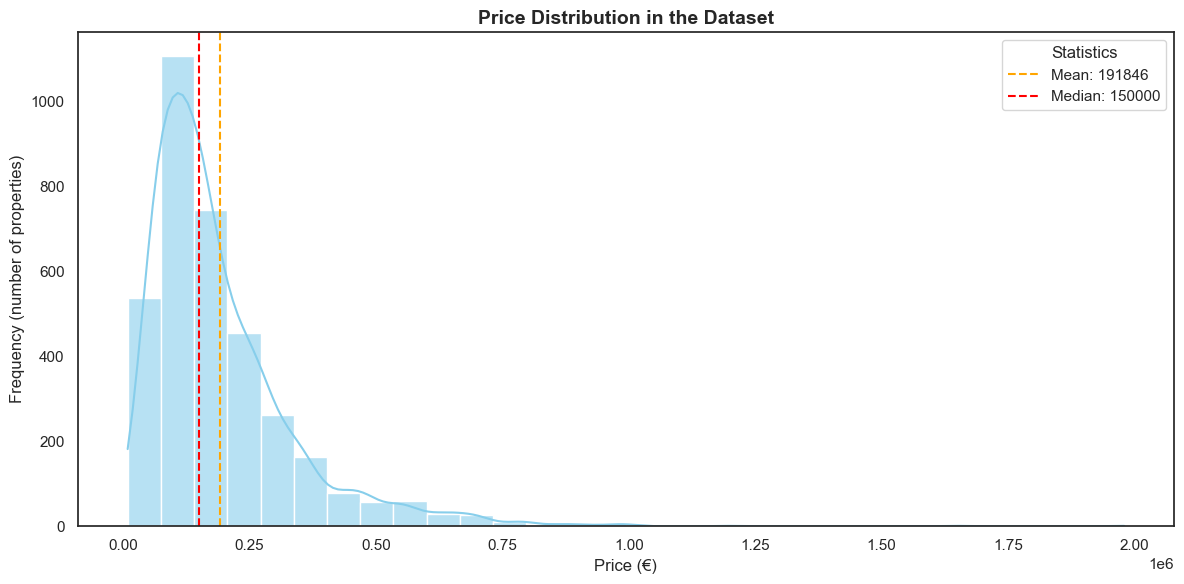

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram with KDE
sns.histplot(
    df['price'], 
    bins=30, 
    kde=True, 
    color='skyblue', 
    alpha=0.6, 
    ax=ax
)

# Add reference lines for mean and median
ax.axvline(df['price'].mean(), color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {round(df["price"].mean())}')
ax.axvline(df['price'].median(), color='red', linestyle='--', linewidth=1.5, label=f'Median: {round(df["price"].median())}')

# Titles and labels
ax.set_title('Price Distribution in the Dataset', fontsize=14, fontweight='bold')
ax.set_xlabel('Price (€)', fontsize=12)
ax.set_ylabel('Frequency (number of properties)', fontsize=12)

# Legend
ax.legend(title='Statistics', loc='upper right')

plt.tight_layout()
plt.savefig("../img/price_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusion: Average Price by Property Type

Flats are the cheapest type of property, with an average price of €184,841, below the overall mean (€191,846). In contrast, country houses, penthouses, and duplexes have significantly higher prices.

Country houses lead with €293,499, followed by penthouses (€276,263) and duplexes (€252,592), all above the average.

If you're looking for something more affordable, flats are the most economical option. The most expensive properties are likely priced higher due to their exclusivity or additional features.

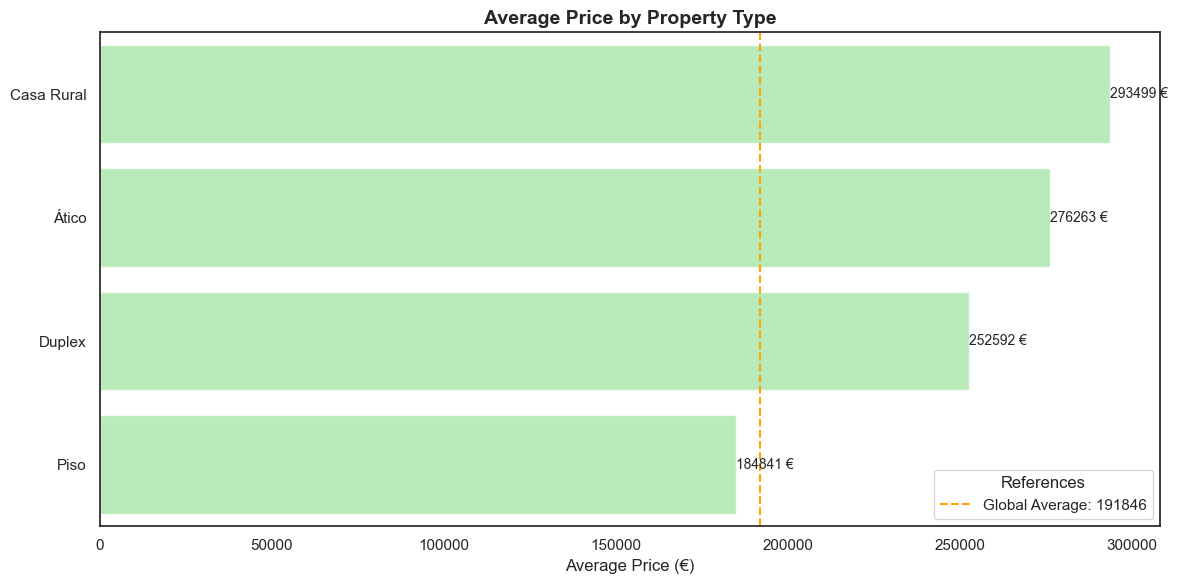

In [18]:
# Calculate average price by property type
price_by_type = df.groupby('property_type')['price'].mean().sort_values(ascending=False)

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    x=price_by_type.values, 
    y=price_by_type.index, 
    color='lightgreen', 
    alpha=0.7,
    orient='h'
)

# Add reference line for global average
global_avg_price = df['price'].mean()
ax.axvline(global_avg_price, color='orange', linestyle='--', linewidth=1.5, label=f'Global Average: {round(global_avg_price)}')

# Add labels above the bars
for i, value in enumerate(price_by_type.values):
    ax.text(value + 5, i, f'{round(value)} €', va='center', fontsize=10)

# Titles and labels
ax.set_title('Average Price by Property Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Price (€)', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.legend(loc='lower right', title='References')

plt.tight_layout()
plt.savefig("../img/price_by_property_type.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusion: Relationship Between Built Square Meters and Price

There is a positive relationship between the size of the property and its price, although with considerable dispersion. Most properties are concentrated below 250 m² and €500,000.

Flats tend to occupy the lower range in terms of size and price, while country houses and penthouses appear among the largest and most expensive.

Size clearly influences price, but it is not the only determining factor.

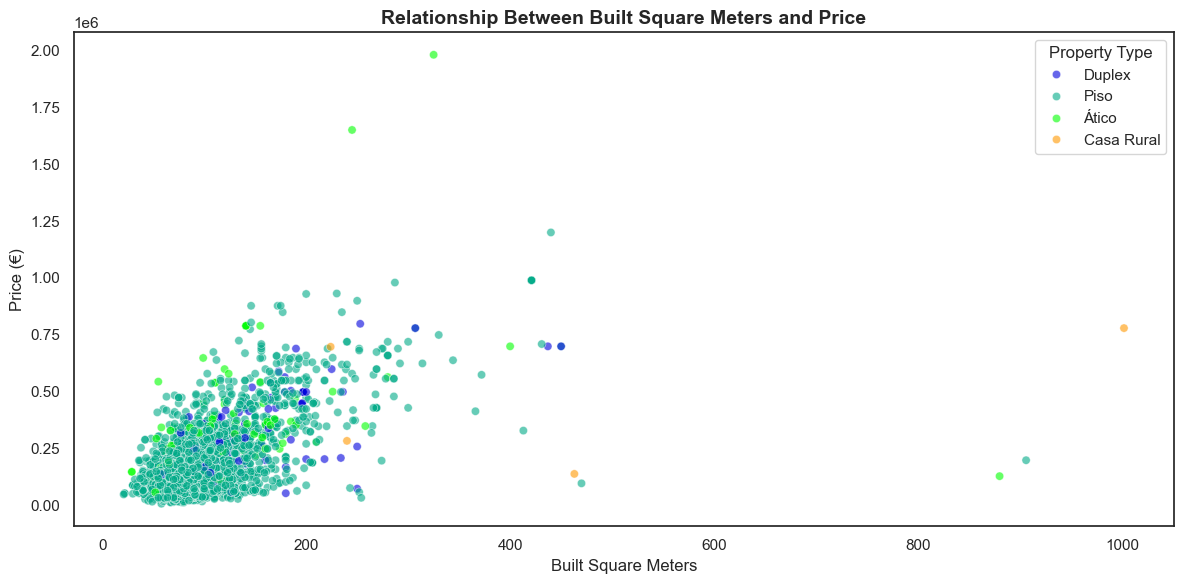

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x='built_sqm', 
    y='price', 
    hue='property_type', 
    palette='nipy_spectral',
    alpha=0.6
)

plt.title("Relationship Between Built Square Meters and Price", fontsize=14, fontweight='bold')
plt.xlabel("Built Square Meters", fontsize=12)
plt.ylabel("Price (€)", fontsize=12)
plt.legend(title="Property Type")

plt.tight_layout()
plt.savefig("../img/m2_vs_price.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusion: Correlation Matrix

Price is strongly related to euros per square meter (0.70) and built square meters (0.58). There is also some correlation with bathrooms (0.54) and rooms (0.38).

Built square meters are especially correlated with rooms (0.71) and bathrooms (0.56), while euros per square meter have no clear relationship with other variables.

Overall, both the size and the quality of the property influence its final value.

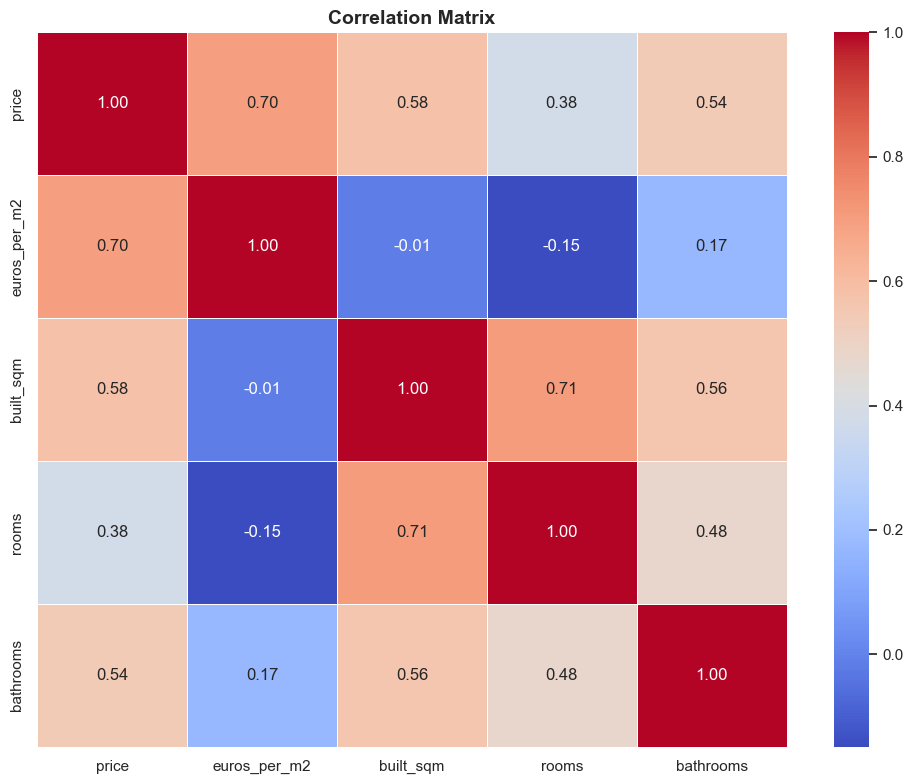

In [20]:
# Calculate correlation matrix
corr_matrix = df[['price', 'euros_per_m2', 'built_sqm', 'rooms', 'bathrooms']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("../img/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusion: Proportion of Additional Features

The elevator is the most common feature, present in nearly 80% of properties. Terrace and parking appear in around 30–35%, while the pool is very rare, found in less than 5%.

This suggests that certain basic amenities are common, but extras like a pool remain an exception.

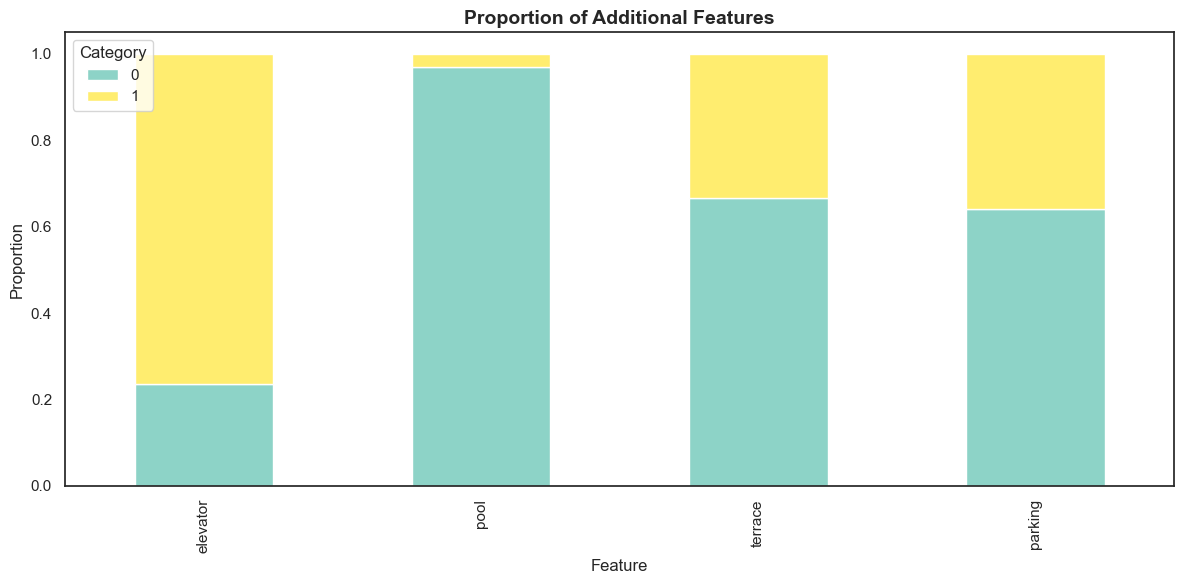

In [22]:
# Calculate proportions
features = ['elevator', 'pool', 'terrace', 'parking']
feature_counts = df[features].apply(lambda col: col.value_counts(normalize=True)).T

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
feature_counts.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')

# Titles and labels
ax.set_title('Proportion of Additional Features', fontsize=14, fontweight='bold')
ax.set_xlabel('Feature', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.legend(title="Category", loc='upper left')

plt.tight_layout()
plt.savefig("../img/additional_features.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusion: Proportion of Property and Seller Types

The vast majority of listed properties are flats, making up over 90% of the total. Types like duplexes, penthouses, and country houses have minimal presence.

Regarding seller type, professionals dominate (almost 80%), while private sellers represent only a small portion of the market.

This reflects a market heavily concentrated in a single property type and strongly dominated by agencies or professional intermediaries.

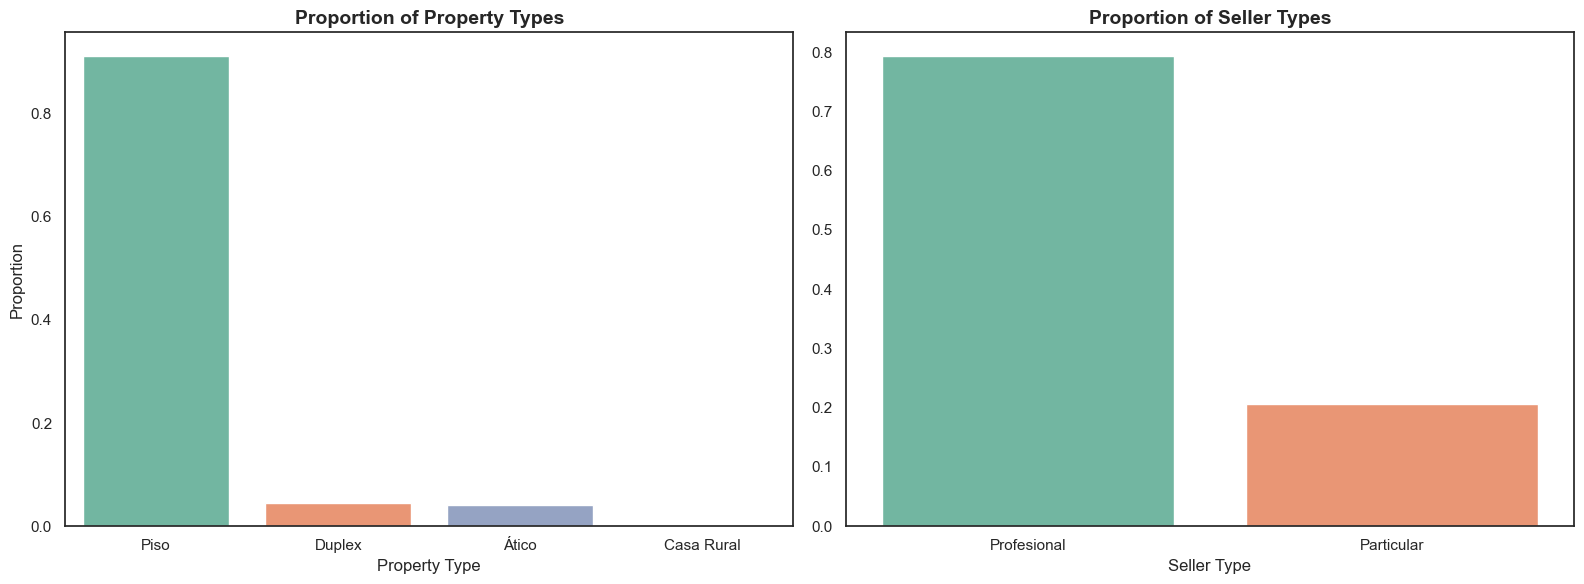

In [23]:
# Create a figure with subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust size as needed

# Proportion of property types
property_type_counts = df['property_type'].value_counts(normalize=True)
sns.barplot(
    x=property_type_counts.index, 
    y=property_type_counts.values, 
    palette='Set2', 
    ax=axes[0]
)
axes[0].set_title("Proportion of Property Types", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Property Type", fontsize=12)
axes[0].set_ylabel("Proportion", fontsize=12)

# Proportion of seller types
seller_type_counts = df['seller_type'].value_counts(normalize=True)
sns.barplot(
    x=seller_type_counts.index, 
    y=seller_type_counts.values, 
    palette='Set2', 
    ax=axes[1]
)
axes[1].set_title("Proportion of Seller Types", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Seller Type", fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the combined figure
plt.savefig("../img/property_seller_type_proportion.png", dpi=300, bbox_inches="tight")

# Show the figure
plt.show()

### **⛏ Data Preprocessing**

In [24]:
# One-Hot Encoding for variables with few categories
df = pd.get_dummies(df, columns=['property_type', 'seller_type'], drop_first=True)

In [25]:
# Target Encoding for high-cardinality variables
encoder = TargetEncoder()
df['neighborhood_encoded'] = encoder.fit_transform(df['neighborhood'], df['price'])
df['municipality_encoded'] = encoder.fit_transform(df['municipality'], df['price'])
df['district_encoded'] = encoder.fit_transform(df['district'], df['price'])

# Drop original categorical columns that have been encoded
df.drop(columns=['neighborhood', 'municipality', 'district'], inplace=True)

### **🔰 Dataset Split**

In [26]:
# Separate independent variables (X) and target variable (y)
X = df.drop(columns=['price'])  # Adjust based on your target variable
y = df['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [27]:
# Scaling Numerical Variables (after the split — to avoid leakage)
scaler = StandardScaler()
num_cols = ['euros_per_m2', 'built_sqm', 'rooms', 'bathrooms', 'floor']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### **🤖 Model Training**

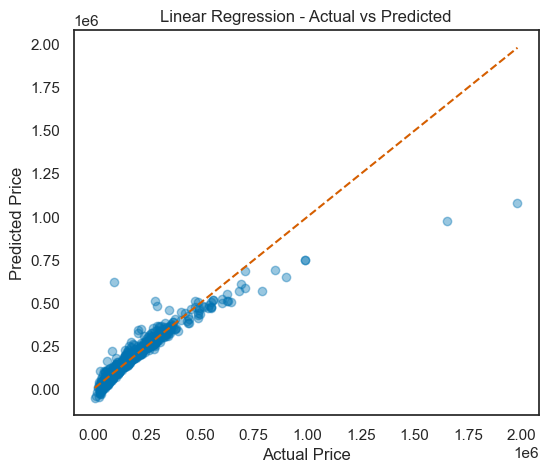

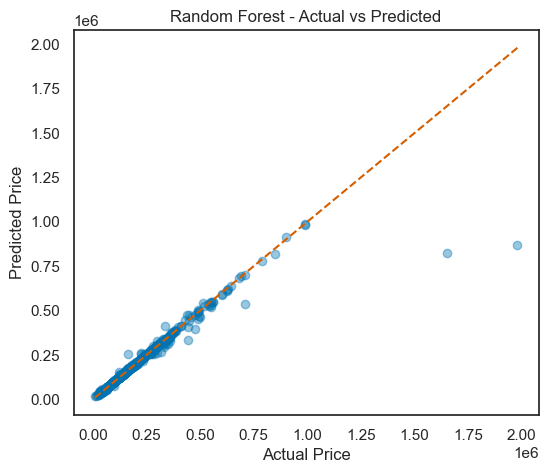

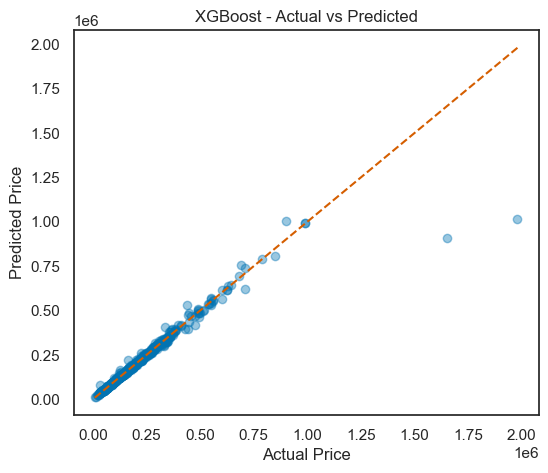

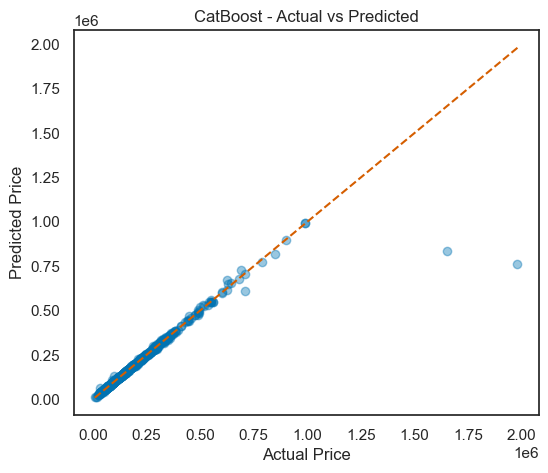

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=seed),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=seed),
    "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, random_state=seed, verbose=0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append((name, mae, rmse, r2))
    
    # Plot
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.show()

### 📊 Comparative Results

In [29]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"]).sort_values(by="R2", ascending=False)
print(results_df)

               Model           MAE          RMSE        R2
2            XGBoost   7549.133862  46853.543170  0.915601
1      Random Forest   6328.179831  53159.861546  0.891353
3           CatBoost   5839.004537  55387.233127  0.882058
0  Linear Regression  24688.959803  59016.631900  0.866094


### 🔍 Permutation Importance / XGBoost

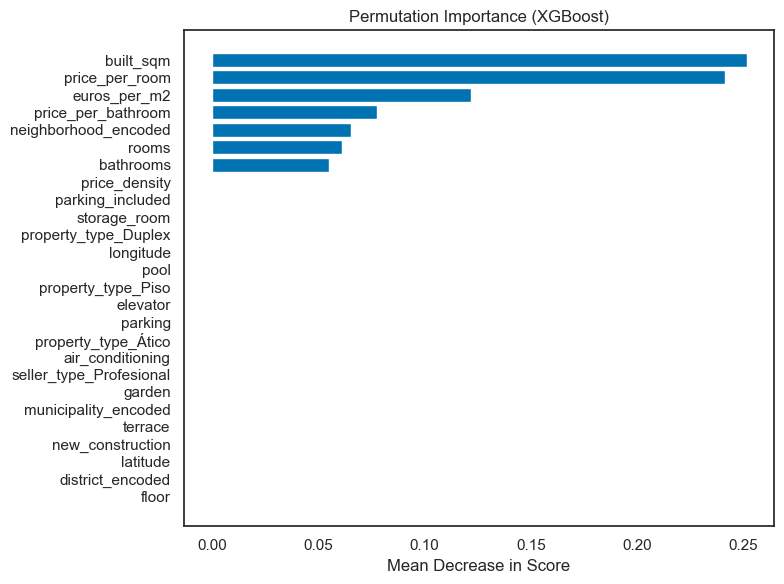

In [30]:
best_model = models["XGBoost"]
perm = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=seed)

importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': perm.importances_mean
}).sort_values(by='importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.title("Permutation Importance (XGBoost)")
plt.xlabel("Mean Decrease in Score")
plt.tight_layout()
plt.show()

In [31]:
# Select only the 7 most important variables according to the previous plot
top_features = [
    'built_sqm',
    'price_per_room',
    'euros_per_m2',
    'price_per_bathroom',
    'neighborhood_encoded',
    'rooms',
    'bathrooms'
]

# New reduced dataset
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# Train new model with top variables
xgb_reduced = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=seed)
xgb_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = xgb_reduced.predict(X_test_reduced)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_reduced)
mse = mean_squared_error(y_test, y_pred_reduced)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_reduced)

print("🔍 Reduced model (top 7 variables):")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

🔍 Reduced model (top 7 variables):
MAE:  7446.64
RMSE: 46321.38
R²:   0.9175


### 💾 Model Saving

In [32]:
# Save the reduced model
with open('../models/xgb_reduced_model.pkl', 'wb') as f:
    pickle.dump(xgb_reduced, f)

# Save the full model
with open("../models/xgb_full_model.pkl", "wb") as f:
    pickle.dump(best_model, f)